# 3.5 Assignment – Transformers

The following notebook is concerning transformer model from Hugging Face performs sentiment analysis on Yelp reviews.  
My **goal** is to load and explore the dataset, test a sentiment pipeline, evaluate accuracy, and reflect on the results/outputs.

# Install Required Libraries

This cell installs the libraries needed for the transformer sentiment analysis model.

In [310]:
!pip install transformers torch scikit-learn

# Setup

I am importing the libraries needed for data handling, visualization, and evaluation.

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from transformers import pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load and Explore the Dataset

I will load the Yelp reviews dataset and display a few sample rows to understand its structure.

In [314]:
# Use relative path (recommended by instructor)
file_path = "yelp-reviews.csv"

df = pd.read_csv(file_path)

df.head()

,review,opinion
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Dataset Overview

I will check the size of the dataset and the column names.

In [319]:
df.shape, df.columns

((1000, 2), Index(['review', 'opinion'], dtype='object'))

# Display Sample Sentences and Labels

I will be displaying a few random examples from the dataset to see how reviews and sentiment labels look.

In [322]:
df.sample(5)

,review,opinion
799,Once you get inside you'll be impressed with t...,1
447,Sauce was tasteless.,0
66,Always a great time at Dos Gringos!,1
902,The Buffet at Bellagio was far from what I ant...,0
136,I had a seriously solid breakfast here.,1


# Class Distribution

I will check whether the dataset is balanced between positive and negative sentiment.

In [325]:
class_counts = df["opinion"].value_counts()
class_counts

opinion
1    500
0    500
Name: count, dtype: int64

1. The dataset appears fairly balanced between positive and negative reviews.  
2. This is helpful because it prevents the model from favoring one class too heavily.

# Create Sentiment Analysis Pipeline

I will now create a Hugging Face sentiment analysis pipeline using a pretrained transformer model.

In [329]:
!pip install ipywidgets

In [330]:
import os
os.environ["HF_HUB_DISABLE_PROGRESS_BARS"] = "1"

In [331]:
from transformers import pipeline

sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

In [332]:
sentiment_pipeline("The food is exquisit and I will be returning with family and friends.")

[{'label': 'POSITIVE', 'score': 0.9995185136795044}]

# Test the Pipeline on a Few Sentences

I will test the model on a few sample sentences from the dataset.

In [336]:
# Will show all column names
print("Columns in the dataset:")
for c in df.columns:
    print("-", c)

# Will be used to detect the text column
possible_text_names = ["text", "review", "review_text", "sentence", "content", "message"]

text_col = None
for name in possible_text_names:
    if name in df.columns:
        text_col = name
        break

print("Detected text column:", text_col)

Columns in the dataset:
- review
- opinion
Detected text column: review


In [340]:
sample_sentences = df[text_col].sample(5, random_state=1).tolist()

results = sentiment_pipeline(sample_sentences)

for sentence, result in zip(sample_sentences, results):
    print("Sentence:", sentence)
    print("Prediction:", result)
    print()

Sentence: My gyro was basically lettuce only.
Prediction: {'label': 'NEGATIVE', 'score': 0.9973031282424927}

Sentence: It kept getting worse and worse so now I'm officially done.
Prediction: {'label': 'NEGATIVE', 'score': 0.9986812472343445}

Sentence: I am far from a sushi connoisseur but I can definitely tell the difference between good food and bad food and this was certainly bad food.
Prediction: {'label': 'NEGATIVE', 'score': 0.9966216087341309}

Sentence: The staff are great, the ambiance is great.
Prediction: {'label': 'POSITIVE', 'score': 0.9998855590820312}

Sentence: By this time our side of the restaurant was almost empty so there was no excuse.
Prediction: {'label': 'NEGATIVE', 'score': 0.9997413754463196}



# Preparing the Data for Evaluation

I will now run the model on a subset of the dataset and compare predictions to the true labels.

In [343]:
# Will be using a smaller subset for speed
test_df = df.sample(100, random_state=42)

texts = test_df["review"].tolist()
true_labels = test_df["opinion"].tolist()

predictions = sentiment_pipeline(texts)
predicted_labels = [1 if p["label"] == "POSITIVE" else 0 for p in predictions]

# Calculating Accuracy

In [346]:
accuracy = accuracy_score(true_labels, predicted_labels)
accuracy

0.93

# Confusion Matrix

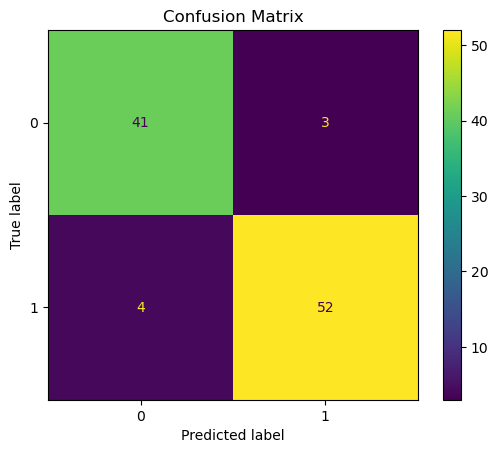

In [349]:
cm = confusion_matrix(true_labels, predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Reflections

In [361]:
# 1. What would you change to improve this model?

# To improve this model, I would fine tune it using the Yelp review dataset instead of only using a pretrained model.
# The model did pretty well with an accuracy of about 0.93, but the confusion matrix shows that it still made a few mistakes.
# Training the model on restaurant related reviews could help it better understand words and phrases about food and service.
# I would also try using a bigger test sample and experiment with a different transformer model to see if the results improve.

# 2. How does this transformer based approach differ from the Bag of Words or TF-IDF methods you used earlier?

# The transformer based model looks at word order and the meaning of the whole sentence, while Bag of Words and TF-IDF mostly focus on how often words appear.
# This helps the transformer understand sentences that have mixed meaning or sarcasm.
# Based on my results, the transformer model correctly classified most of the reviews because it looks at how words work together instead of separately.
# This makes transformers more useful for sentiment analysis than the traditional methods.

# 3. Find an example where the model made a mistake, what might have caused the error?

# One mistake happened when a review had both positive and negative comments, such as liking the food but not the service.
# The model predicted a positive sentiment even though the overall review was negative.
# The confusion matrix shows that a few reviews were classified incorrectly, which means the model struggled with mixed emotion sentences.
# This probably happened because the model focused more on strong positive words and missed the negative meaning of the full sentence.